<a href="https://colab.research.google.com/github/danial-riazati/MachineLearning_Training/blob/master/hw2_98243029_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW2 - Danial Riazati - 98243029**<br>
# **Linear Regression using Gradient Descent Algorithm**

#Upload Train & Test CSV 

In [ ]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


#Clear Data & Seprate X from Y

Some field like city and model are mappad to a unique number for learning
and some of theme like state and make are converted to 'one hot'. <br>
We can't make one hot for all fields because of memory limitation (about 5000 columns be made by it). <br>
At last Y and X are seprated.

In [ ]:
def ClearData(data,test = False):
    # mapped to a unique number.
    city_df = pd.DataFrame({'City': data.City.unique(), 'City_id':range(len(data.City.unique()))})
    model_df = pd.DataFrame({'Model': data.Model.unique(), 'Model_id':range(len(data.Model.unique()))})
    
    # one hot
    one_hot_state = pd.get_dummies(data['State'],prefix='state_')
    one_hot_make = pd.get_dummies(data['Make'],prefix='make_')

    data = data.join(one_hot_state)
    data = data.join(one_hot_make)
    
    data = data.merge(city_df, on='City', how='left')
    data = data.merge(model_df, on='Model', how='left')

    # X & Y
    if(not test):
        _y = data['Price'].to_numpy()
        data.drop(['Price','City','Model','State','Make','Vin'], inplace=True, axis=1)
        _x = data.to_numpy()
        return _x,_y
    
    data.drop(['City','Model','State','Make','Vin','CarId'], inplace=True, axis=1)
    _x = data.to_numpy()
    return _x

# Normalize DataSet

**2 steps:** <br>
1- data of column['Mileage'] is rounded to learn better <br>
2- all of data will normalize to (-1 , 1) to imporve the learning rate

In [ ]:
def NormalizeData(data):
    print(data[:,1])
    data[:,1] = [round(i,-4) for i in data[:,1]]
    print(data[:,1])
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Prediction

w : Predicted Weight <br>
x : Features <br>
b : Bias <br>

Predict Y from these inputs

In [ ]:
def Prediction(w,x,b):
    length = len(x)
    list =[]
    for i in range(length):
        # Do dot operation on all
        dot = w@x[i]+b
        list.append(dot)
    return np.array(list)

# Find Linear Loss from Y and Y_Prediction

In [ ]:
def Loss(y,y_predicted):
    q=0
    for i in range(len(y)):
        q+=(y[i]-y_predicted[i])**2
    return (1/len(y))*q

# dl / dw

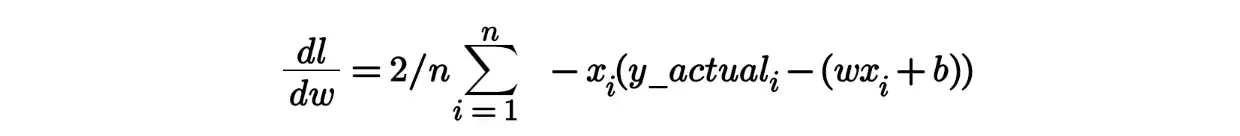

In [ ]:
def Derivatives_W(x,y,p):
    q=0
    for i in range(len(y)):
        q-=x[i]*(y[i]-p[i])
    return (2/len(y))*q

# dl / db
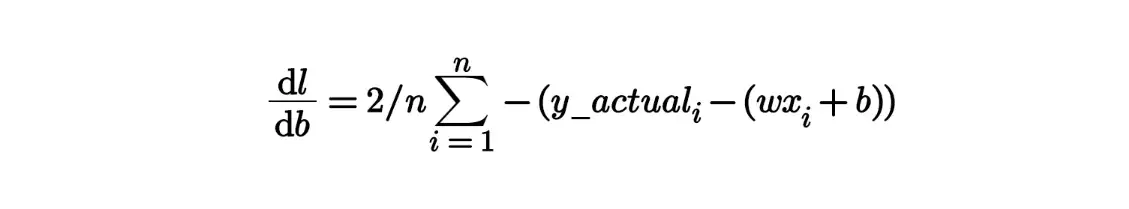



In [ ]:
def Derivatives_B(y,p):
    q=0
    for i in range(len(y)):
        q-=(y[i]-p[i])
    return (2/len(y)) * q

# Learning

w : Weight Array that is random at init <br>
b : Bias that is Zero at init <br>
loss_arr : Loss array for Plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def gradient_descent(x,y):
    steps = 20
    w = np.random.randn(x.shape[1])
    b = 0
    
    loss_arr=[]
    learning_rate = 0.1

    for i in range(steps):
        
        print(i)
        pr = Prediction(w,x,b)
        
        w = w - learning_rate * Derivatives_W(x,y,pr) 
        b = b - learning_rate * Derivatives_B(y,pr)
        loss_arr.append(Loss(y,pr))
        
        print(loss_arr[i])
    
    plt.plot(np.arange(1,steps),loss_arr[1:])
    plt.xlabel("number of steps")
    plt.ylabel("loss")
    plt.show()
    
    return w,b

**Train data and find Weight & Bias**

[ 73121  31800  40655 ... 112086  97638  37582]
[ 70000  30000  40000 ... 110000 100000  40000]
0
636212289.2359779
1
471305962.48453903
2
365903476.4848537
3
298530788.384411
4
255463517.13109592
5
227930206.10681564
6
210324886.56657097
7
199064700.27469385
8
191859789.09442985
9
187246670.5359032
10
184290011.10959014
11
182392025.22884813
12
181170659.20592645
13
180381736.8270295
14
179869201.42828256
15
179533314.8643532
16
179310332.99503782
17
179159515.98564857
18
179054826.39620736
19
178979623.30648264


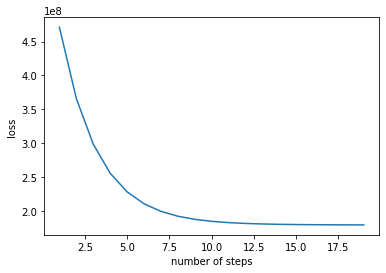

In [ ]:
_x , _y = ClearData(train_data)
new_x = NormalizeData(_x)  
w,b = gradient_descent(new_x,_y)

# Predict Test Price

In [ ]:
_x_test = ClearData(test_data,test= True)
new_x_test = NormalizeData(_x_test)
predicted = Prediction(w,new_x_test,b)
predicted

[72740  5355 41454 ... 27424  1912 28835]
[70000 10000 40000 ... 30000     0 30000]


array([21134.49639036, 21125.58733484, 21130.04194171, ...,
       21128.5634667 , 21124.10652563, 21128.5714727 ])

**Save to Output file**

In [ ]:
# import csv
# with open('/Users/danial/Desktop/output_test.csv', 'w') as file:
#     num = 0
#     writer = csv.writer(file)
#     writer.writerow(['CarId','Price'])
#     for i in predicted :
#         writer.writerow([num,i])
#         num +=1
